In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

## Préliminaires

Il s'agit de minimiser la fonction quadratique sous contraintes linéaires.
$$\inf_{(x_1,x_2)\in K} x_1^2 + x_2^2 - 14x_1 - 6x_2 - 7$$
avec $K = \{x_1 + x_2 \le 2 \text{ et } x_1 + 2x_2 \le 3\}$.

In [ ]:
m = GEKKO(remote=False)

x1 = m.Var()
x2 = m.Var()

m.Equation(x1 + x2 <= 2)
m.Equation(x1 + 2*x2 <= 3)

f = x1**2 + x2**2 - 14*x1 - 6*x2 - 7
m.Minimize(f)

m.options.IMODE = 3
m.solve(disp=False)

x1v = x1.value[0]
x2v = x2.value[0]
f_opt = x1v**2 + x2v**2 - 14*x1v - 6*x2v - 7

print('x1* =', x1v)
print('x2* =', x2v)
print('f*  =', f_opt)


x1* = 3.0
x2* = -1.0
f*  = -33.0


## Problèmes de contrôle optimal à résoudre numériquement

### 1ère version

Optimal final time T* = 0.76823916668
x(T) = -0.29804666569
y(T) = -0.76823916668


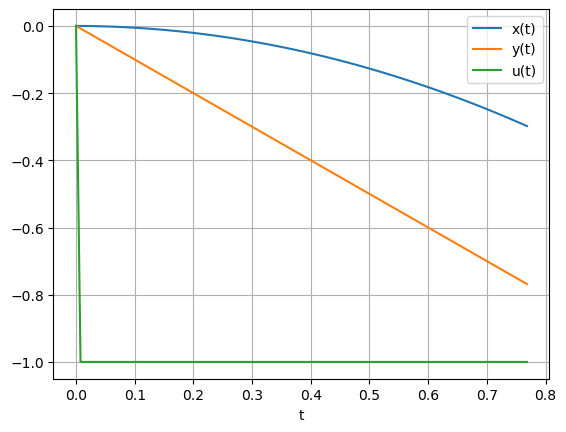

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO(remote=False)  

nt = 101
m.time = np.linspace(0, 1, nt)

x = m.Var(value=0.0)
y = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.1, ub=50.0)
T.STATUS = 1

u = m.MV(value=0.0, lb=-1.0, ub=1.0)
u.STATUS = 1

m.Equation(x.dt() == T * y)
m.Equation(y.dt() == T * u)

W = 1e5

m.Minimize(W * (final * x)**2)
m.Minimize(W * (final * (y + 1))**2)

m.Minimize(T)

m.options.IMODE = 6
m.options.SOLVER = 3     #IPOPT

m.solve(disp=False)

print('Optimal final time T* =', T.value[0])
print('x(T) =', x.value[-1])
print('y(T) =', y.value[-1])

tm = np.linspace(0, T.value[0], nt)

plt.figure()
plt.plot(tm, x.value, label='x(t)')
plt.plot(tm, y.value, label='y(t)')
plt.plot(tm, u.value, label='u(t)')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()


### 2ème version

Optimal T* = 2.1792854499
x(T) = -0.0007854121156
y(T) = -0.9
z(T) = 0.29236777267


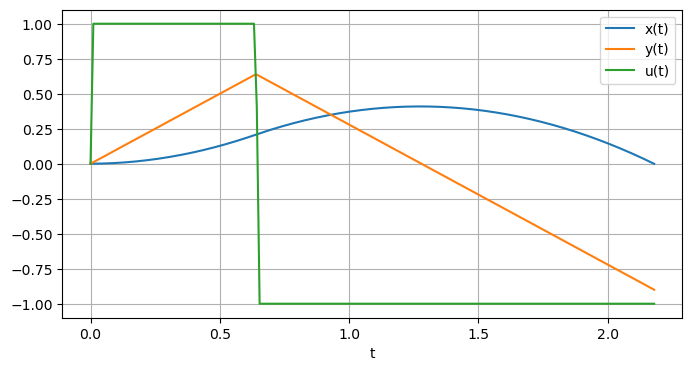

In [13]:
alpha = 0.5
eps   = 0.1
W     = 1e5

m = GEKKO(remote=False)

nt = 201
m.time = np.linspace(0,1,nt)

x = m.Var(value=0.0)
y = m.Var(value=0.0)
z = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.1, ub=50.0)
T.STATUS = 1

u = m.MV(value=0.0, lb=-1.0, ub=1.0)
u.STATUS = 1

m.Equation(x.dt() == T * y)
m.Equation(y.dt() == T * u)
m.Equation(z.dt() == T * 0.5*(x**2 + y**2))

m.Minimize(W * (final * x)**2)

m.Equation(final*(y + 1 - eps) <= 0)
m.Equation(final*(-y - 1 - eps) <= 0)

m.Minimize(alpha*T + (1-alpha)*z*final)

m.options.IMODE = 6
m.options.SOLVER = 3    # IPOPT

m.solve(disp=False)

print("Optimal T* =", T.value[0])
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])
print("z(T) =", z.value[-1])

tm = np.linspace(0, T.value[0], nt)

plt.figure(figsize=(8,4))
plt.plot(tm, x.value, label='x(t)')
plt.plot(tm, y.value, label='y(t)')
plt.plot(tm, u.value, label='u(t)')
plt.xlabel("t")
plt.grid(True)
plt.legend()
plt.show()


## Contrôle d’insectes.

1. 

$$
\begin{cases}
\dot x(t)=x(t)(1-y(t))\\
\dot y(t)=-y(t)(u(t)-x(t))\\
x(0)=1,\ y(0)=4,
\end{cases}
\quad
1\le u(t)\le 3.
$$

2. 

3.

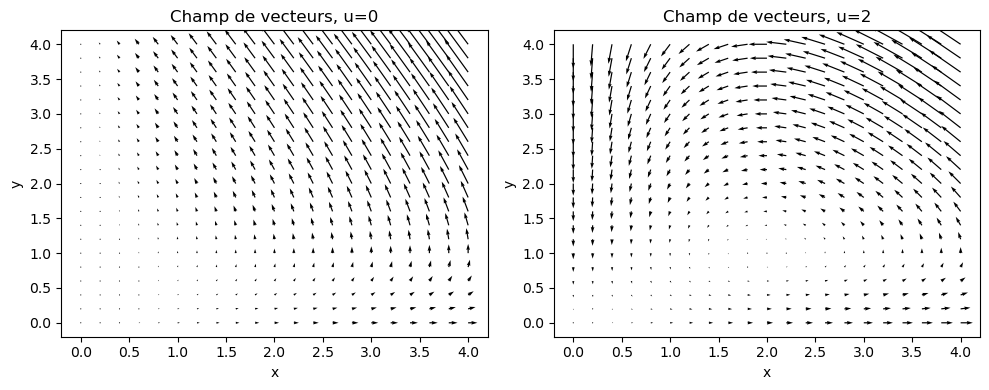

In [5]:
def field(x, y, u):
    dx = x*(1 - y)
    dy = -y*(u - x)
    return dx, dy

X, Y = np.meshgrid(np.linspace(0,4,21), np.linspace(0,4,21))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
Ux, Uy = field(X, Y, u=0.0)
plt.quiver(X, Y, Ux, Uy)
plt.title('Champ de vecteurs, u=0')
plt.xlabel('x'); plt.ylabel('y')

plt.subplot(1,2,2)
Ux, Uy = field(X, Y, u=2.0)
plt.quiver(X, Y, Ux, Uy)
plt.title('Champ de vecteurs, u=2')
plt.xlabel('x'); plt.ylabel('y')

plt.tight_layout()
plt.show()

4. 

T* = 3.5505299779
x(T) = 2.0007405678
y(T) = 0.99904241072


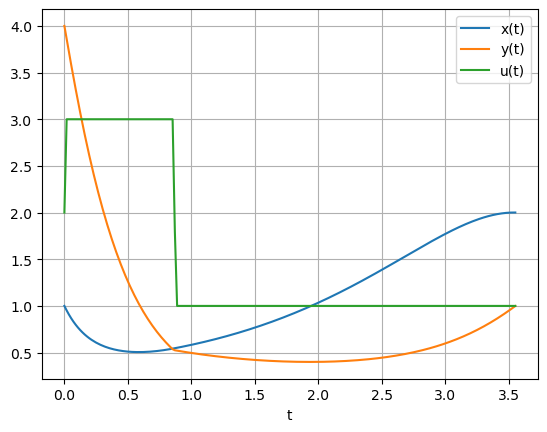

In [ ]:
a = 2.0
W = 1e5

m = GEKKO(remote=False)

nt = 201
m.time = np.linspace(0, 1, nt)

x = m.Var(value=1.0)
y = m.Var(value=4.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.01, ub=50.0)
T.STATUS = 1

u = m.MV(value=2.0, lb=1.0, ub=3.0)
u.STATUS = 1

m.Equation(x.dt() == T * x * (1 - y))
m.Equation(y.dt() == T * (-y * (u - x)))

m.Minimize(W * (final * (x - a))**2)   # x(T) ≈ a
m.Minimize(W * (final * (y - 1))**2)   # y(T) ≈ 1

m.Minimize(T)

m.options.IMODE = 6
m.options.SOLVER = 3
m.solve(disp=False)

print("T* =", T.value[0])
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])

tm = np.linspace(0, T.value[0], nt)
plt.figure()
plt.plot(tm, x.value, label='x(t)')
plt.plot(tm, y.value, label='y(t)')
plt.plot(tm, u.value, label='u(t)')
plt.xlabel('t')
plt.legend(); plt.grid(True)
plt.show()


5.

Optimal T* = 3.5512650181
x(T), y(T) = 2.0003633727 0.99951835368
int u^2 = 10.406477539


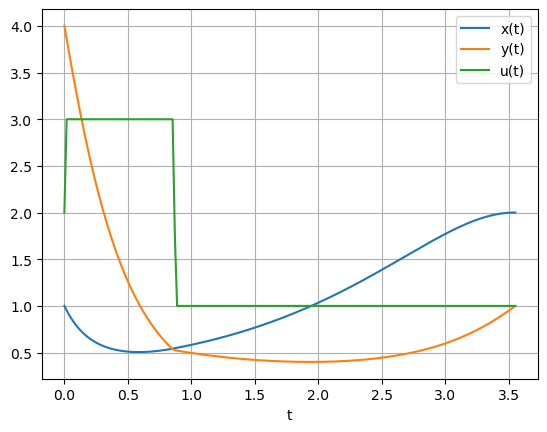

In [ ]:
a = 2.0
alpha = 0.5
W = 1e5

m = GEKKO(remote=False)

nt = 201
m.time = np.linspace(0, 1, nt)

x = m.Var(value=1.0)
y = m.Var(value=4.0) 
z = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.01, ub=50.0)
T.STATUS = 1

u = m.MV(value=2.0, lb=1.0, ub=3.0)
u.STATUS = 1

m.Equation(x.dt() == T * x * (1 - y))
m.Equation(y.dt() == T * (-y * (u - x)))
m.Equation(z.dt() == T * u**2)

# Terminal constraints
m.Minimize(W * (final * (x - a))**2)
m.Minimize(W * (final * (y - 1))**2)

m.Minimize(alpha * T + (1.0 - alpha) * z * final)

m.options.IMODE = 6
m.options.SOLVER = 3
m.solve(disp=False)

print("Optimal T* =", T.value[0])
print("x(T), y(T) =", x.value[-1], y.value[-1])
print("int u^2 =", z.value[-1])

tm = np.linspace(0, T.value[0], nt)
plt.figure()
plt.plot(tm, x.value, label='x(t)')
plt.plot(tm, y.value, label='y(t)')
plt.plot(tm, u.value, label='u(t)')
plt.xlabel('t'); plt.legend(); plt.grid(True)
plt.show()
